# 5. 서포트 벡터 머신
- 다목적 머신러닝 모델
- 복잡한 분류 문제, 작거나 중간 크기의 데이터셋에 적합

## 5.1 선형 SVM 분류
<img src='https://blog.kakaocdn.net/dn/bSj09u/btqJINw6GUw/YaQ6bToaKzuujQhTK45WB1/img.png'>

- 클래스 사이에 가장 폭이 넓은 도로를 찾는 방법, `라지 마진 분류`라고 이야기하기도 함
- **`서포트 벡터`**: 도로 경계에 위치한 샘플에 의해 결정 경계가 의지됨
- 특성의 스케일러에 민감
- SVM의 결정 경계는 가중치 벡터 Θ^T에 직교하면서 마진이 최대가 되는 직선을 찾는 것

### 5.1.1 소프트 마진 분류
**하드 마진 분류**: 모든 샘플이 도로 바깥쪽에 분류되어 있음
- 데이터가 선형적으로 구분될 수 있어야 작동
- 이상치에 민감

**소프트 마진 분류**; 마진 오류와 도로의 폭을 넓게 유지하는 것의 균형  
*svm 모델이 과대적합일 시 C를 감소시켜 모델을 규제할 수 있음*

iris dataset을 적재하고, 특성 스케일링 변경하고 푸종을 감지하기 위한 SVM모델 훈련

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] #꽃잎 길이, 넓이
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

LinearSVC클래스 대신 쓸 수 있는 방법  
- 선형 커널을 사용하는 SVC클래스
    - SVC(kernel='linear', C=1)
- SGDClassifier
    - SGDClassifier(loss='hinge', alpha=1/(m*C))
    - 선형 SVM분류기 훈련을 위해 일반적인 확률적 경사 하강법을 적용.
    - 데이터셋이 아주 크거나 온라인 학습으로 분류 문제를 다룰 때 유용
    
LinearSVC는 규제에 편향을 포함하기 때문에 훈련 세트에서 평균을 빼서 중앙에 맞춰야 함  
StandardScaler를 사용하면 자동으로 처리

## 5.2 비선형 SVM 분류
비선형 데이터셋을 다루기 위한 방법 중 하나는 다항 특성과 같은 특성을 추가하여 선형적으로 구분되는 데이터셋으로 만들기(ex 축)

make_moons: 반원 모양으로 데이터 포인트가 놓여 있는 이진 분류 데이터

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X, y)

C:\Users\tende\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

### 5.2.1 다항식 커널
낮은 차수의 다항식은 복잡한 데이터셋을 잘 표현하지 못하고, 높은 차수의 다항식은 모델을 느리게 만든다!  
**`커널 트릭`**; 실제로는 특성을 추가하지 않으면서 다항식 특성을 추가한 것과 같은 결과

In [5]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
    #coef0 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
])

### 5.2.2 유사도 특성
- 각 샘플이 특정 `랜드마크`(임의의 점)와 얼마나 유사한지 측정하는 **`유사도 함수`**로 계산한 특성을 추가
- 유사도 함수: 주어진 데이터를 고차원 특징 공간으로 사상해주는 것
- 함수값은 0(랜드마크와 멀리 떨어짐)~1까지 종 모양으로 나타남

**랜드마크 선택**
- 간단한 방법: 모든 샘플 위치에 랜드마크 설정
- 단점: 훈련 세트가 클 경우 많은 특성이 만들어짐


*출처: https://sooah26.tistory.com/79*

### 5.2.3 가우시안 RBF 커널


In [6]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

<img src='https://lh3.googleusercontent.com/proxy/753tRj6DbaYt2izTk3oSAQaEcTwywwC5ku6YeeUmuDGnS0y2cwJW_2U7YQVfGoMDkTaROBtqAK_gu_BFfAPmhLg3qyJgpfH1Lef9MKrzwln1VXy0knXpM_cMQ9gax2c6VA8eKJG6OV_dzJ6U9zEuFVJYsCiCa-AV5Yx-ShfJBh9OI5WPKSEw58wEWeoQyyAyeeGiNiRvr0UA7ccUruENBQt1dIlZlxq_TVfOpAzKWUGLQ6UzKVGpBaS4FGcx00RgPyEPmhb_0Z2YY5TAXQEfn3PSZqG9NvcDo8nEy4awc8wSYToeft32'>

**`gamma`**
- 증가하면 종 모양이 좁아져 샘플의 영향 범위가 작아지고, 결정 경계가 불규칙해지며 샘플을 따라 구불구불 휘어짐  
- 하이퍼파라미터 C와 비슷
- 규제의 역할을 하기 때문에 과대적합일 경우 감소시켜야 함
- <u>모델의 복잡도를 조절하려면 gamma와 C를 함께 조정하는 것이 좋음</u>

  
*어떤 커널을 먼저 사용할까?*  
경험적으로 선형 커널을 먼저 시도(LinearSVC가 SVC(kernel='linear')보다 훨씬 빠르다

### 5.2.4 계산 복잡도
LinerSVC 클래스의 훈련 시간 복잡도는 대략 O(mxn)  
정밀도를 높이면 알고리즘의 수행 시간이 길어지고, 이는 허용오차 파라미터로 조절  
희소 특성인 경우에 잘 확장됨

## 5.3 SVM 회귀

- SVM 알고리즘은 다목적으로 사용할 수 있기 때문에 선형/비선형 회귀에도 사용할 수 있음
- 회귀의 경우 앞선 목표와 반대로 제한된 마진 오류(도로 밖 샘플) 안에서 도로 안에 많은 샘플이 들어가도록 학습
- 도로의 폭은 하이퍼파라미터로 조절
- 마진 안에서는 샘플이 추가되어도 모델의 예측에는 영향이 없어 `민감하지 않다`고 말함

선형 SVM회귀 예시

In [7]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

비선형 회귀, 규제가 거의 없다면 아주 큰 C

In [8]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = 'poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

SVR은 SVC의 회귀 버전. LinearSVR은 훈련 세트가 커지면 훨씬 느려짐.

## 5.4 SVM 이론
*이하의 내용은 이론적 부분으로, 비교적 더 알고싶었던 부분을 검색하여 첨부하며 주피터 안에 쓰기가 어려워 생략됨*

**Decision Boundary의 결정**: 가중치 벡터(w)에 직교하면서 margin이 최대가 되는 선형 찾기
- 직교해야하는 이유? > 계산상의 편의를 위해 b=0으로 가정하면 WtX=0 > boundary로 정의, 2개 벡터 내적이 0이 되는 각도는 90임으로 직교로 판단
- WtX + b = 1 (b=0으로 가정했을 때 >1인 경유 Class2로 분류)

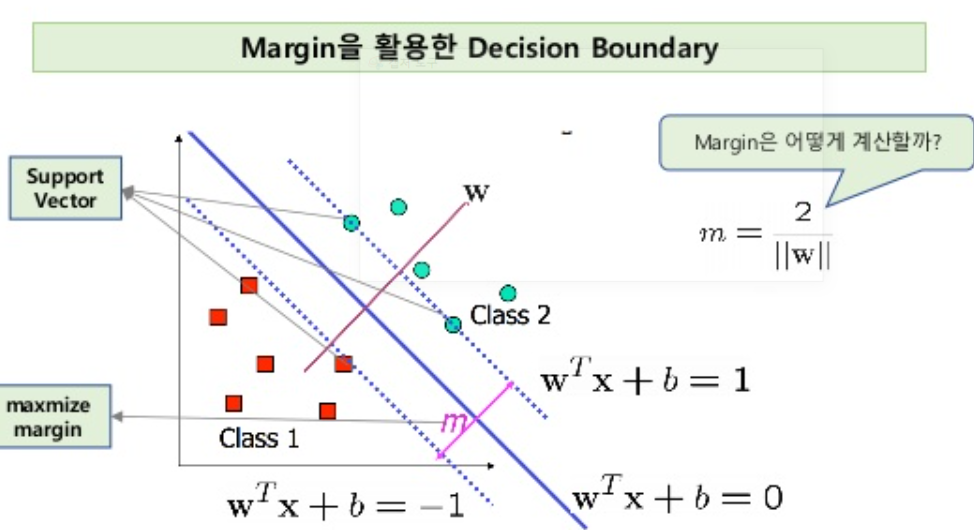

**SVM Cost Function** 
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile24.uf.tistory.com%2Fimage%2F99D0074E5B757FC4469A7B'>

- 정답의 유형(0,1)에 따라 Cost가 증가하는 방향이 다르고 hinge loss함수를 사용
- l(y) = max(0, 1-ty)
- t = 의도한 결과(+1, -1)
- y = 분류 결과(y=WX+b), x=분류할 input point
- 기존 loss와는 달리 y는 예측된 확률이 아니라 wx+b의 결과값!!

*출처: [내가 이해하는 SVM(왜, 어떻게를 중심으로](https://www.slideshare.net/freepsw/svm-77055058))*

### 5.4.2 목적 함수

<img src='https://unsolvedproblem.github.io/assets/images/Hands-on/Ch5fig15.png'>

- 결정 함수의 기울기 = 가중치 벡터의 노름w
- 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같음!!
- 가중치 벡터 w가 작을수록 마진은 커짐